# Traitement des images

Notamment pour l'étude du volume. De combien de pourcents le volume de l'hydrogel augmente-t-il pendant sa congélation ?

### Calcul de l'augmentation du volume

Nombre de pixels verts détectés : 635911
Nombre de pixels rouges détectés : 46554
Pourcentage d'augmentation : 7.32%


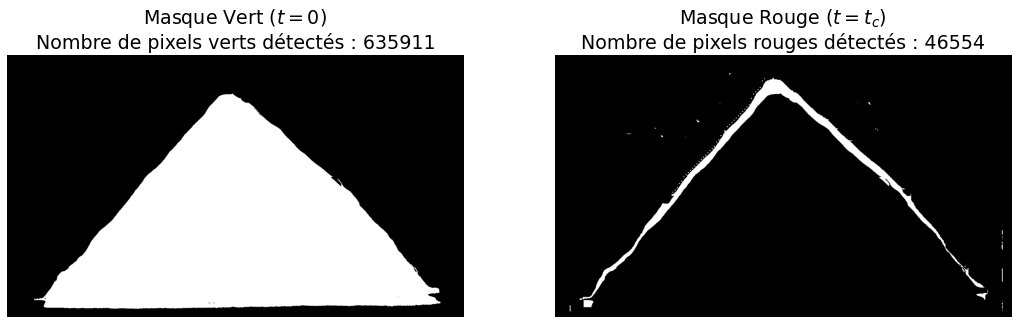

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Charger l'image
image_path = 'Ratio Début Fin.png'
image = cv2.imread(image_path)

# Vérifier si l'image est correctement chargée
if image is None:
    raise FileNotFoundError(f"L'image n'a pas pu être chargée à partir du chemin {image_path}")

# Convertir l'image en espace colorimétrique HSV
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Définir la gamme de couleurs pour le vert et le rouge
lower_green = np.array([35, 100, 100])
upper_green = np.array([85, 255, 255])
lower_red1 = np.array([0, 100, 100])
upper_red1 = np.array([10, 255, 255])
lower_red2 = np.array([160, 100, 100])
upper_red2 = np.array([180, 255, 255])

# Créer des masques pour extraire les pixels verts et rouges
mask_green = cv2.inRange(hsv, lower_green, upper_green)
mask_red1 = cv2.inRange(hsv, lower_red1, upper_red1)
mask_red2 = cv2.inRange(hsv, lower_red2, upper_red2)
mask_red = cv2.bitwise_or(mask_red1, mask_red2)

# Calculer le nombre de pixels verts et rouges
green_area = np.sum(mask_green > 0)
red_area = np.sum(mask_red > 0)

# Afficher les valeurs intermédiaires pour déboguer
print(f"Nombre de pixels verts détectés : {green_area}")
print(f"Nombre de pixels rouges détectés : {red_area}")

# Calculer le pourcentage d'augmentation de la superficie
if green_area == 0:
    raise ValueError("La surface verte est nulle, impossible de calculer le pourcentage d'augmentation.")
    
percentage_increase = (red_area / green_area) * 100
print(f"Pourcentage d'augmentation : {percentage_increase:.2f}%")

# Afficher les masques verts et rouges avec le nombre de pixels détectés
plt.figure(figsize=(18, 11))



plt.subplot(1, 2, 1)
plt.title(f'Masque Vert ($t=0$) \nNombre de pixels verts détectés : {green_area}')
plt.imshow(mask_green, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title(f'Masque Rouge ($t=t_c$) \nNombre de pixels rouges détectés : {red_area}')
plt.imshow(mask_red, cmap='gray')
plt.axis('off')

plt.savefig("Augmentation du volume.png")
plt.show()


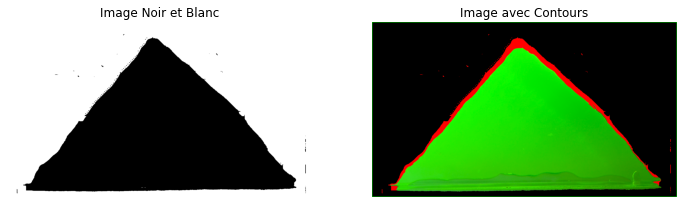

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Charger l'image
image_path = 'Ratio Début Fin.png'  # Remplacez par le chemin réel de votre image
image = cv2.imread(image_path)

# Vérifier si l'image est correctement chargée
if image is None:
    raise FileNotFoundError(f"L'image n'a pas pu être chargée à partir du chemin {image_path}")

# Convertir l'image en niveaux de gris
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Appliquer un seuil pour convertir l'image en noir et blanc
_, binary_image = cv2.threshold(gray_image, 1, 255, cv2.THRESH_BINARY_INV)

# Détecter les contours
contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Tracer les contours sur une copie de l'image d'origine
image_with_contours = image.copy()
cv2.drawContours(image_with_contours, contours, -1, (0, 255, 0), 2)

# Afficher l'image avec les contours
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title('Image Noir et Blanc')
plt.imshow(binary_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Image avec Contours')
plt.imshow(cv2.cvtColor(image_with_contours, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()


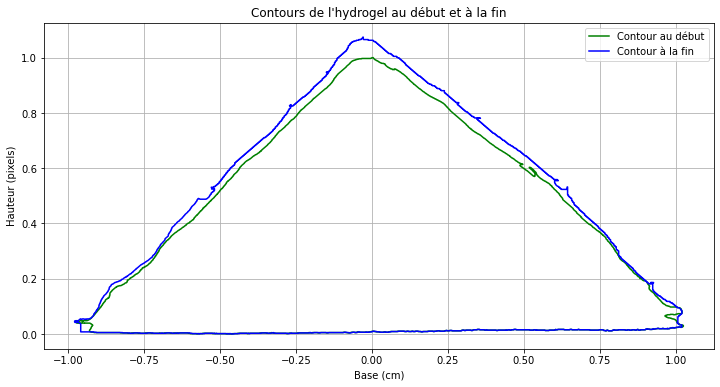

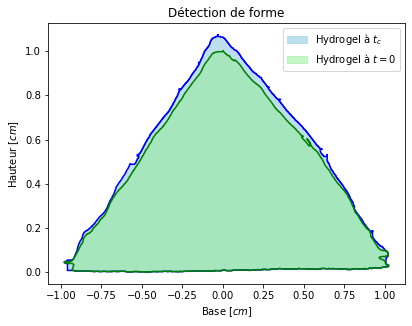

In [161]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def load_and_process_image(image_path):
    """
    Charge l'image, la convertit en niveaux de gris et applique un seuil pour obtenir une image binaire.
    """
    image = cv2.imread(image_path)
    if image is None:
        raise FileNotFoundError(f"L'image n'a pas pu être chargée à partir du chemin {image_path}")
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, binary_image = cv2.threshold(gray_image, 1, 255, cv2.THRESH_BINARY)
    return binary_image

def detect_and_filter_contours(binary_image, min_area=500):
    """
    Détecte et filtre les contours en fonction de leur aire minimale.
    """
    contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    filtered_contours = [c for c in contours if cv2.contourArea(c) > min_area]
    return filtered_contours

def normalize_contour(contour, base_length, image_height):
    """
    Normalise les coordonnées du contour pour que la base du triangle soit alignée avec l'axe X.
    """
    # Calculer la bounding box du contour
    x, y, w, h = cv2.boundingRect(contour)
    scale_x = base_length / w  # Échelle basée sur la largeur du contour
    points = [(point[0][0] * scale_x, image_height - point[0][1]) for point in contour]
    return points

def rotate_points(points, angle):
    """
    Applique une rotation de 180 degrés aux points.
    """
    angle_rad = np.deg2rad(angle)
    cos_angle = np.cos(angle_rad)
    sin_angle = np.sin(angle_rad)
    rotated_points = [(x * cos_angle - y * sin_angle, x * sin_angle + y * cos_angle) for x, y in points]
    return rotated_points

# Chemins vers les images
image_path_debut = 'DebutTri.png'
image_path_fin = 'TriFin.png'

# Traitement des images
binary_image_debut = load_and_process_image(image_path_debut)
binary_image_fin = load_and_process_image(image_path_fin)

# Détection et filtrage des contours
min_area = 1000  # Aire minimale pour filtrer les petits contours parasites
contours_debut = detect_and_filter_contours(binary_image_debut, min_area)
contours_fin = detect_and_filter_contours(binary_image_fin, min_area)

# Normaliser les contours pour la base du triangle
base_length = 2  # longueur de la base en cm

# Extraire et normaliser les coordonnées des contours
image_height_debut, _ = binary_image_debut.shape
image_height_fin, _ = binary_image_fin.shape

contour_debut_points = normalize_contour(contours_debut[0], base_length, image_height_debut) if contours_debut else []
contour_fin_points = normalize_contour(contours_fin[0], base_length, image_height_fin) if contours_fin else []

# Appliquer la rotation de 180 degrés aux contours
rotated_contour_debut_points = rotate_points(contour_debut_points, 180)
rotated_contour_fin_points = rotate_points(contour_fin_points, 180)

# Convertir les points en coordonnées X et Y
def extract_coordinates(points):
    x, y = zip(*points) if points else ([], [])
    return list(x), list(y)

x_debut, y_debut = extract_coordinates(rotated_contour_debut_points)
x_fin, y_fin = extract_coordinates(rotated_contour_fin_points)



# Tracer les contours sur le graphique
plt.figure(figsize=(12, 6))
"""
# Tracer le contour pour le début
if x_debut and y_debut:
    plt.plot(-np.array(x_debut), -np.array(y_debut), label='Contour au début', color='green')

# Tracer le contour pour la fin
if x_fin and y_fin:
    plt.plot(-np.array(x_fin), -np.array(y_fin), label='Contour à la fin', color='blue')

"""

x_debut = np.array(x_debut)
y_debut = np.array(y_debut)

x_fin = np.array(x_fin)
y_fin = np.array(y_fin)

echelle_y = np.abs(np.max(y_debut)-np.min(y_debut)) #Nombre de pixels correspondant à 1cm!
offset_y_d = np.max(y_debut)
offset_y_f = np.max(y_fin)

milieu_d = x_debut[np.argmin(y_debut)]
milieu_f = x_fin[np.argmin(y_fin)]

plt.plot(-np.array(x_debut)+milieu_d, -np.array(y_debut)/echelle_y + offset_y_d/echelle_y, label='Contour au début', color='green')
plt.plot(-np.array(x_fin)+milieu_f-0.03, -np.array(y_fin)/echelle_y + offset_y_f/echelle_y, label='Contour à la fin', color='blue')
    
plt.xlabel('Base (cm)')
plt.ylabel('Hauteur (pixels)')
plt.title('Contours de l\'hydrogel au début et à la fin')
plt.legend()
plt.grid(True)
plt.savefig("Contours_Hydrogel.png")
plt.show()

# Conversion des données pour le début
x_debut_transformed = -np.array(x_debut) + milieu_d
y_debut_transformed = -np.array(y_debut) / echelle_y + offset_y_d / echelle_y

# Conversion des données pour la fin
x_fin_transformed = -np.array(x_fin) + milieu_f - 0.03
y_fin_transformed = -np.array(y_fin) / echelle_y + offset_y_f / echelle_y

# Tracé des contours avec remplissage

plt.figure(figsize=[6.4,4.8])

plt.fill(x_fin_transformed, y_fin_transformed, color='lightblue', alpha=0.8, label=r'Hydrogel à $t_c$')
plt.plot(x_fin_transformed, y_fin_transformed, color='blue')
plt.fill(x_debut_transformed, y_debut_transformed, color='lightgreen', alpha=0.5, label=r'Hydrogel à $t=0$')
plt.plot(x_debut_transformed, y_debut_transformed, color='green')

plt.xlabel(r'Base [$cm$]')
plt.ylabel(r'Hauteur [$cm$]')
plt.title("Détection de forme")

# Ajout de la légende et affichage du graphique
plt.legend()
plt.show()




In [170]:
import scienceplots

plt.rcParams.update({
    'font.size': 14,       # Taille de police générale
    'axes.titlesize': 19,  # Taille de la police du titre des axes
    'axes.labelsize': 16,  # Taille de la police des étiquettes des axes
    'xtick.labelsize': 13, # Taille de la police des étiquettes des graduations en x
    'ytick.labelsize': 13, # Taille de la police des étiquettes des graduations en y
    'legend.fontsize': 13, # Taille de la police de la légende
    'figure.titlesize': 20 # Taille de la police du titre de la figure
})

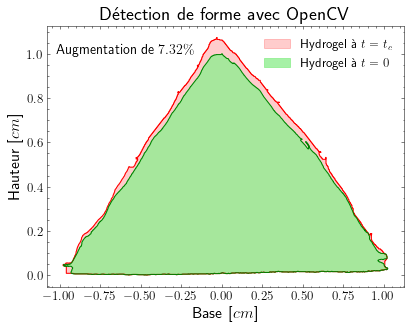

In [38]:
with plt.style.context('science'):
    plt.figure(figsize=[6.4,4.8])

    plt.fill(x_fin_transformed, y_fin_transformed, color='red', alpha=0.2, label=r'Hydrogel à $t=t_c$')
    plt.plot(x_fin_transformed, y_fin_transformed, color='red')
    plt.fill(x_debut_transformed, y_debut_transformed, color='lightgreen', alpha=0.8, label=r'Hydrogel à $t=0$')
    plt.plot(x_debut_transformed, y_debut_transformed, color='green')

    
    plt.text(-1.02, 1, r"Augmentation de $7.32\%$")
    
    plt.xlabel(r'Base [$cm$]')
    plt.ylabel(r'Hauteur [$cm$]')
    plt.title(r"Détection de forme avec OpenCV")

    # Ajout de la légende et affichage du graphique
    plt.legend()
    plt.savefig('Detection_forme.pdf')